<a href="https://colab.research.google.com/github/mumikam/Hyperspectral/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Study on Hyperspectral Images
### Author: Kamila Muminova

## Cloning the repository from Github

In [1]:
!git clone https://github.com/mumikam/Hyperspectral.git

Cloning into 'Hyperspectral'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 23 (delta 0), reused 3 (delta 0), pack-reused 16
Receiving objects: 100% (23/23), 140.21 MiB | 29.57 MiB/s, done.
Resolving deltas: 100% (3/3), done.


## Installing and importing needed libraries



In [ ]:
!pip install spectral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import scipy.io as sio
import os
import numpy as np
import spectral
from sklearn.decomposition import PCA
from IPython.display import Image
import random
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
import matplotlib.pyplot as plt

## Function Definitions

### Defining needed function to load data

In [ ]:
def loadData(dataPath, labelPath):
    rawData = sio.loadmat(dataPath)
    dataName = list(rawData.keys())[3]
    data = rawData[dataName]
    rawLabels = sio.loadmat(labelPath)
    labelName = list(rawLabels.keys())[3]
    labels = rawLabels[labelName]

    return data, labels

### Defining the function to print false color images

---



In [ ]:
def printFalseColor(X, R, G, B):
    spectral.imshow(X, (R, G, B),figsize =(7,7))

### Defining the function to print ground truth image



In [ ]:
def printGroundTruth(y):
    spectral.imshow(classes = y,figsize =(7,7))

### Defining the function to print original image


In [ ]:
def printOriginal(X, R, G, B):
    spectral.imshow(X, (R, G, B),figsize =(7,7))

### Defining the function to print original image with labels


In [ ]:
def printOverlay(X, y, R, G, B):
    view = spectral.imshow(X, (29, 19, 9), classes=y,figsize =(7,7))
    view.set_display_mode('overlay')
    view.class_alpha = 0.5

### Defining the function to print ground truth, original and false color images of given hyperspectral cube

In [ ]:
def printSummary(dataPath, labelPath):
    X, y = loadData(dataPath, labelPath)
    color1, color2, color3 = int(X.shape[2]/6), int(X.shape[2]/2), int(X.shape[2]/6*5)
    printFalseColor(X, color1, color2, color3)
    printFalseColor(X, color2, color3, color1)
    printFalseColor(X, color3, color1, color2)
    printGroundTruth(y)
    printOriginal(X, 29, 19, 9)
    printOverlay(X, y, 29, 19, 9)

##Printing Summary of Given Hyperspectral Cube

/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


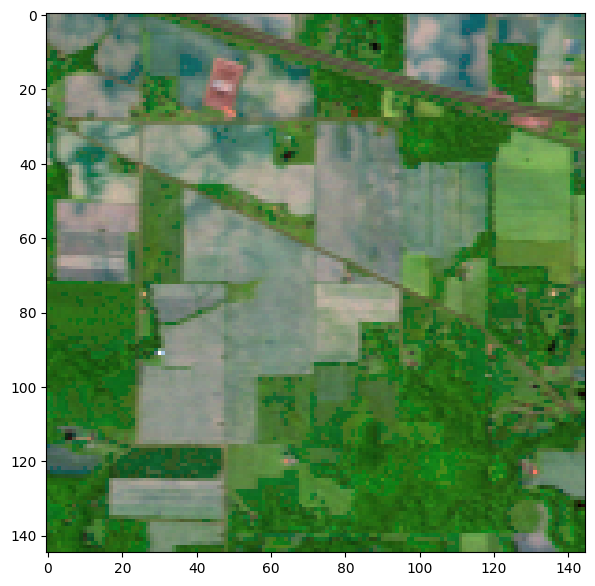

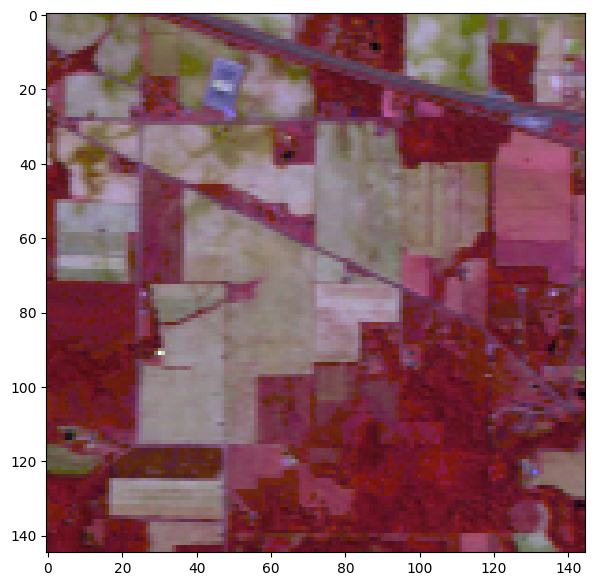

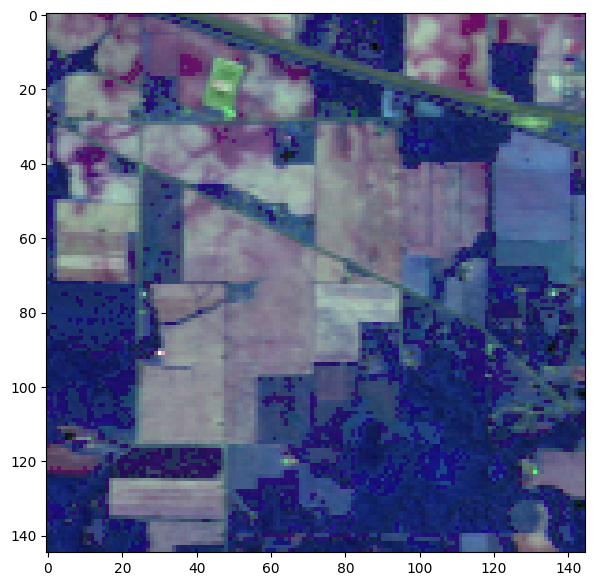

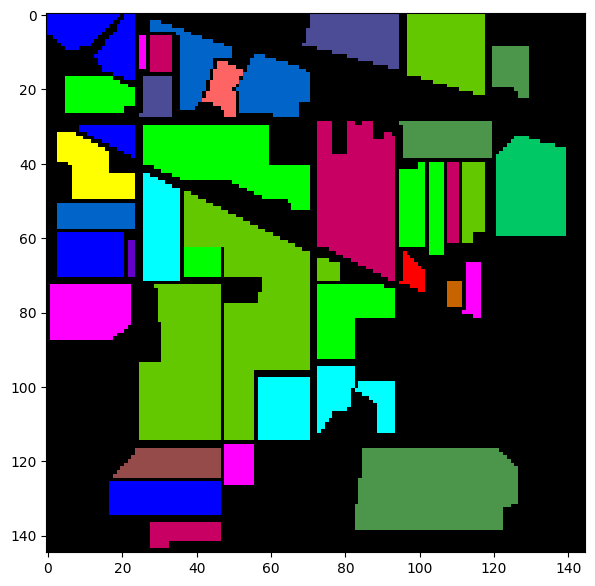

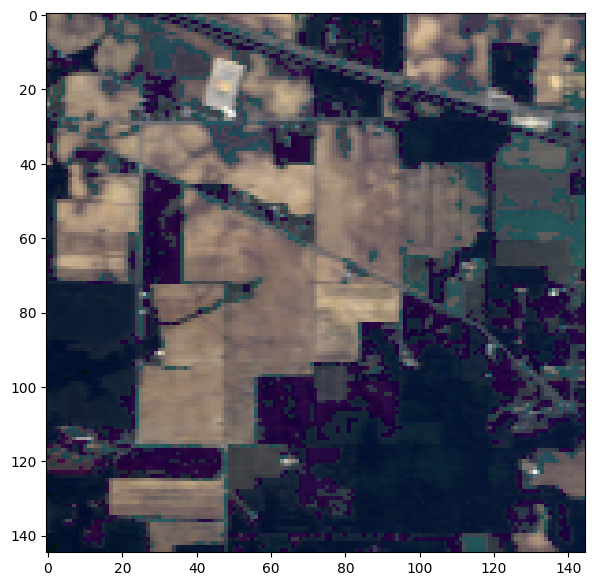

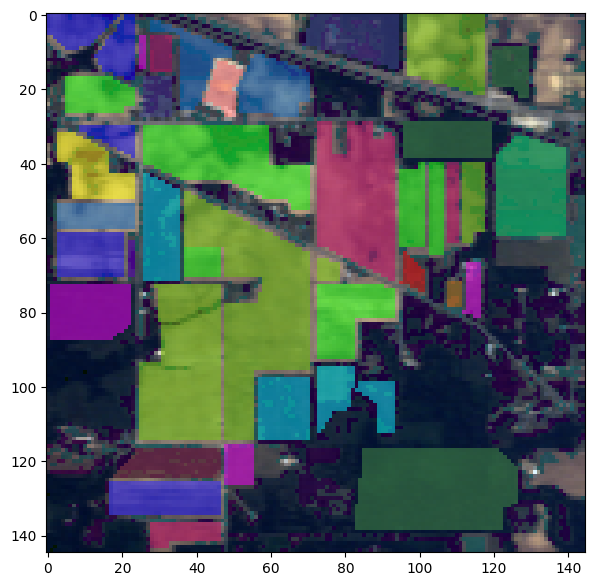

In [ ]:
printSummary("/content/Hyperspectral/data/Indian_pines_corrected.mat", "/content/Hyperspectral/data/Indian_pines_gt.mat")

##Indian Pines Spectrum Plot

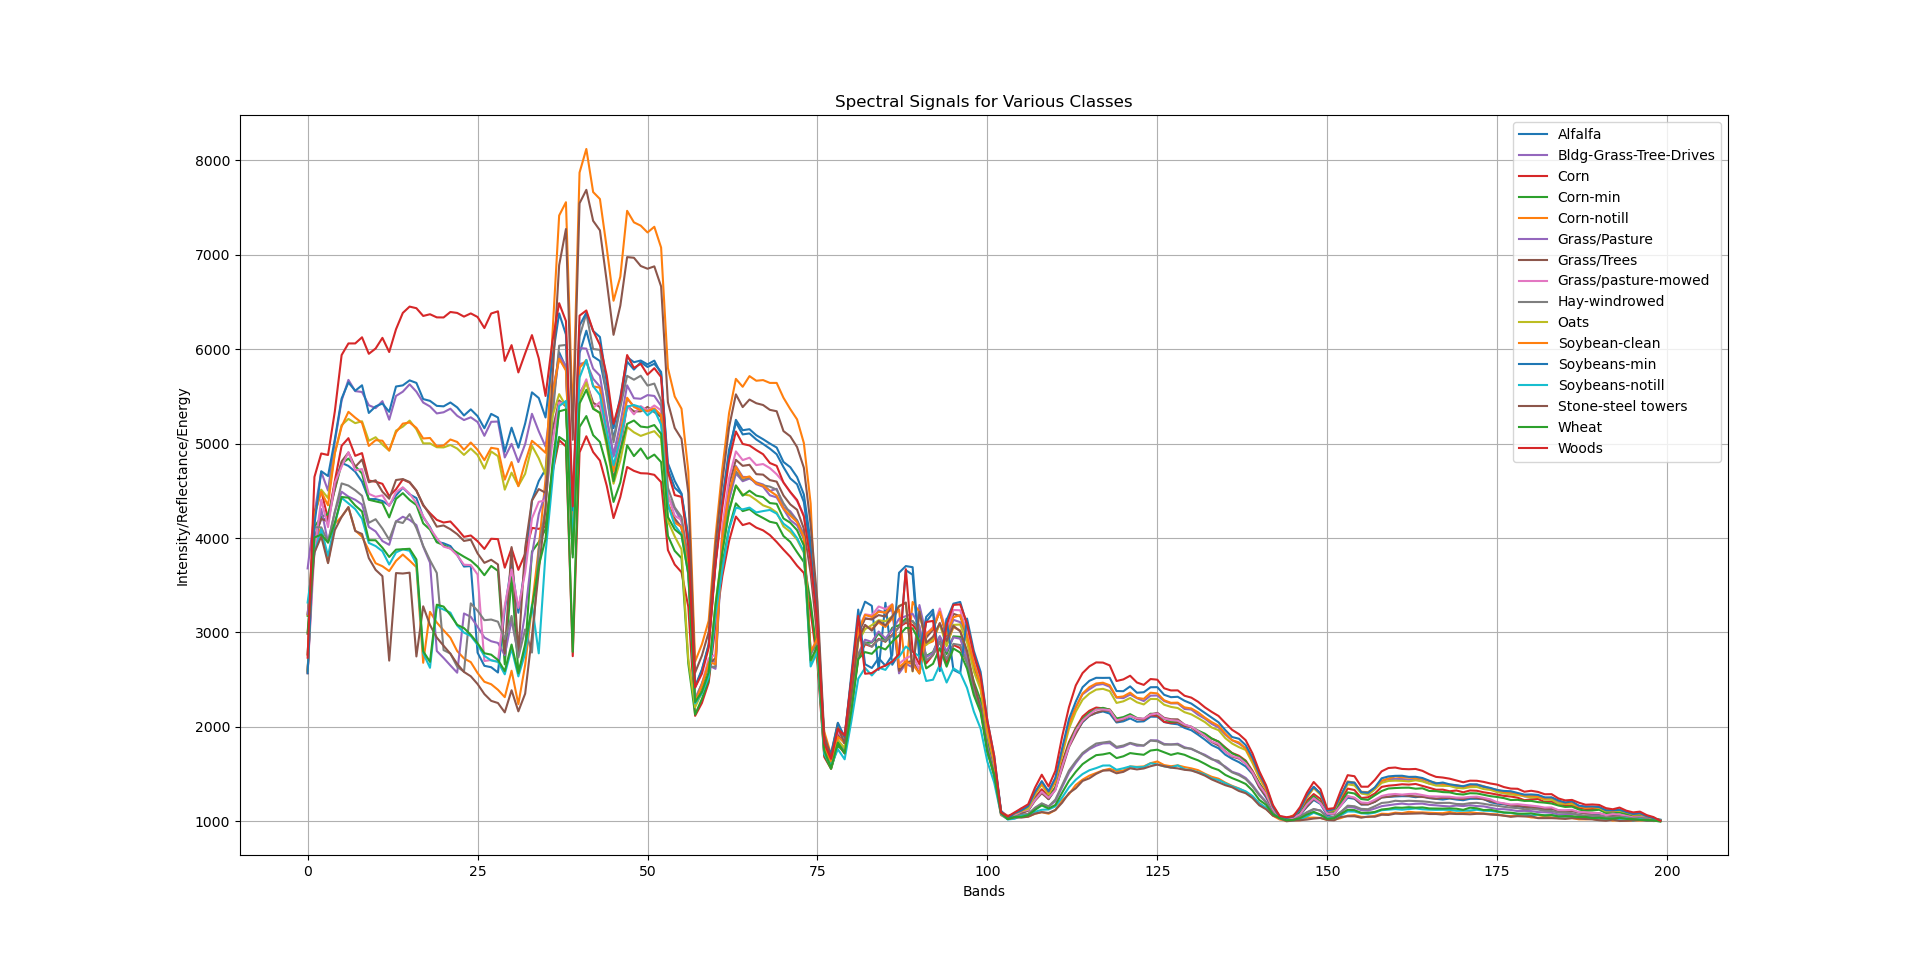

In [ ]:
Image("/content/Hyperspectral/figure/Spectrums.png")